In [21]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA

In [3]:
repo = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19'
branch = f'{repo}/master'

confirmed_df = pd.read_csv(f'{branch}/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

print(f'TimeSeries last date:\t'
      f'{datetime.strptime(confirmed_df.columns[-1], "%m/%d/%y"):"%Y-%m-%d"}')

TimeSeries last date:	"2021-02-06"


In [4]:
confirmed_df.info()
confirmed_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Columns: 386 entries, Province/State to 2/6/21
dtypes: float64(2), int64(382), object(2)
memory usage: 823.4+ KB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629


In [5]:
confirmed_df.columns.tolist()[:5]

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20']

In [6]:
confirmed = (confirmed_df
 .drop(columns=['Province/State', 'Lat', 'Long'])
 .rename(columns={'Country/Region': 'country'})
 .groupby('country').sum())

confirmed.info()
confirmed.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Columns: 382 entries, 1/22/20 to 2/6/21
dtypes: int64(382)
memory usage: 574.5+ KB


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330
Albania,0,0,0,0,0,0,0,0,0,0,...,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212
Algeria,0,0,0,0,0,0,0,0,0,0,...,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629


In [7]:
confirmed = (confirmed
             .append(confirmed.sum(axis='index').rename('World'))
             .sort_index())

confirmed.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21
country,,,,,,,,,,,,,,,,,,,,,
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,157593,158168,158559,158962,159443,159956,160426,161087,161559,162029
World,557,655,941,1433,2118,2927,5578,6167,8235,9927,...,101457548,102069221,102583835,102965869,103412998,103869838,104391868,104857988,105392577,105764730
Yemen,0,0,0,0,0,0,0,0,0,0,...,2120,2120,2120,2121,2122,2122,2122,2122,2124,2127
Zambia,0,0,0,0,0,0,0,0,0,0,...,50319,51624,53352,54217,55042,56233,57489,59003,60427,61427
Zimbabwe,0,0,0,0,0,0,0,0,0,0,...,32646,32952,33273,33388,33548,33814,33964,34171,34331,34487


In [8]:
confirmed_T = (confirmed
 .transpose()
 .set_index(pd.to_datetime(confirmed.columns.values)))

confirmed_T.info()
confirmed_T.tail(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 382 entries, 2020-01-22 to 2021-02-06
Columns: 193 entries, Afghanistan to Zimbabwe
dtypes: int64(193)
memory usage: 579.0 KB


country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,World,Yemen,Zambia,Zimbabwe
2021-02-04,55231,81993,108381,10137,19996,268,1961635,167568,28842,419801,...,43804,78916,1,128775,1957,161087,104857988,2122,59003,34171
2021-02-05,55265,83082,108629,10172,20030,277,1970009,167726,28848,421189,...,44303,78989,1,129231,1976,161559,105392577,2124,60427,34331
2021-02-06,55330,84212,108629,10206,20062,288,1976689,167937,28851,422522,...,44812,79045,1,129643,1985,162029,105764730,2127,61427,34487


- [matplotlib: Tick locating and formatting](https://matplotlib.org/api/ticker_api.html#tick-locating)
- [formatting y-axis matplotlib with thousands separator and font size](https://stackoverflow.com/questions/51734218/formatting-y-axis-matplotlib-with-thousands-separator-and-font-size)

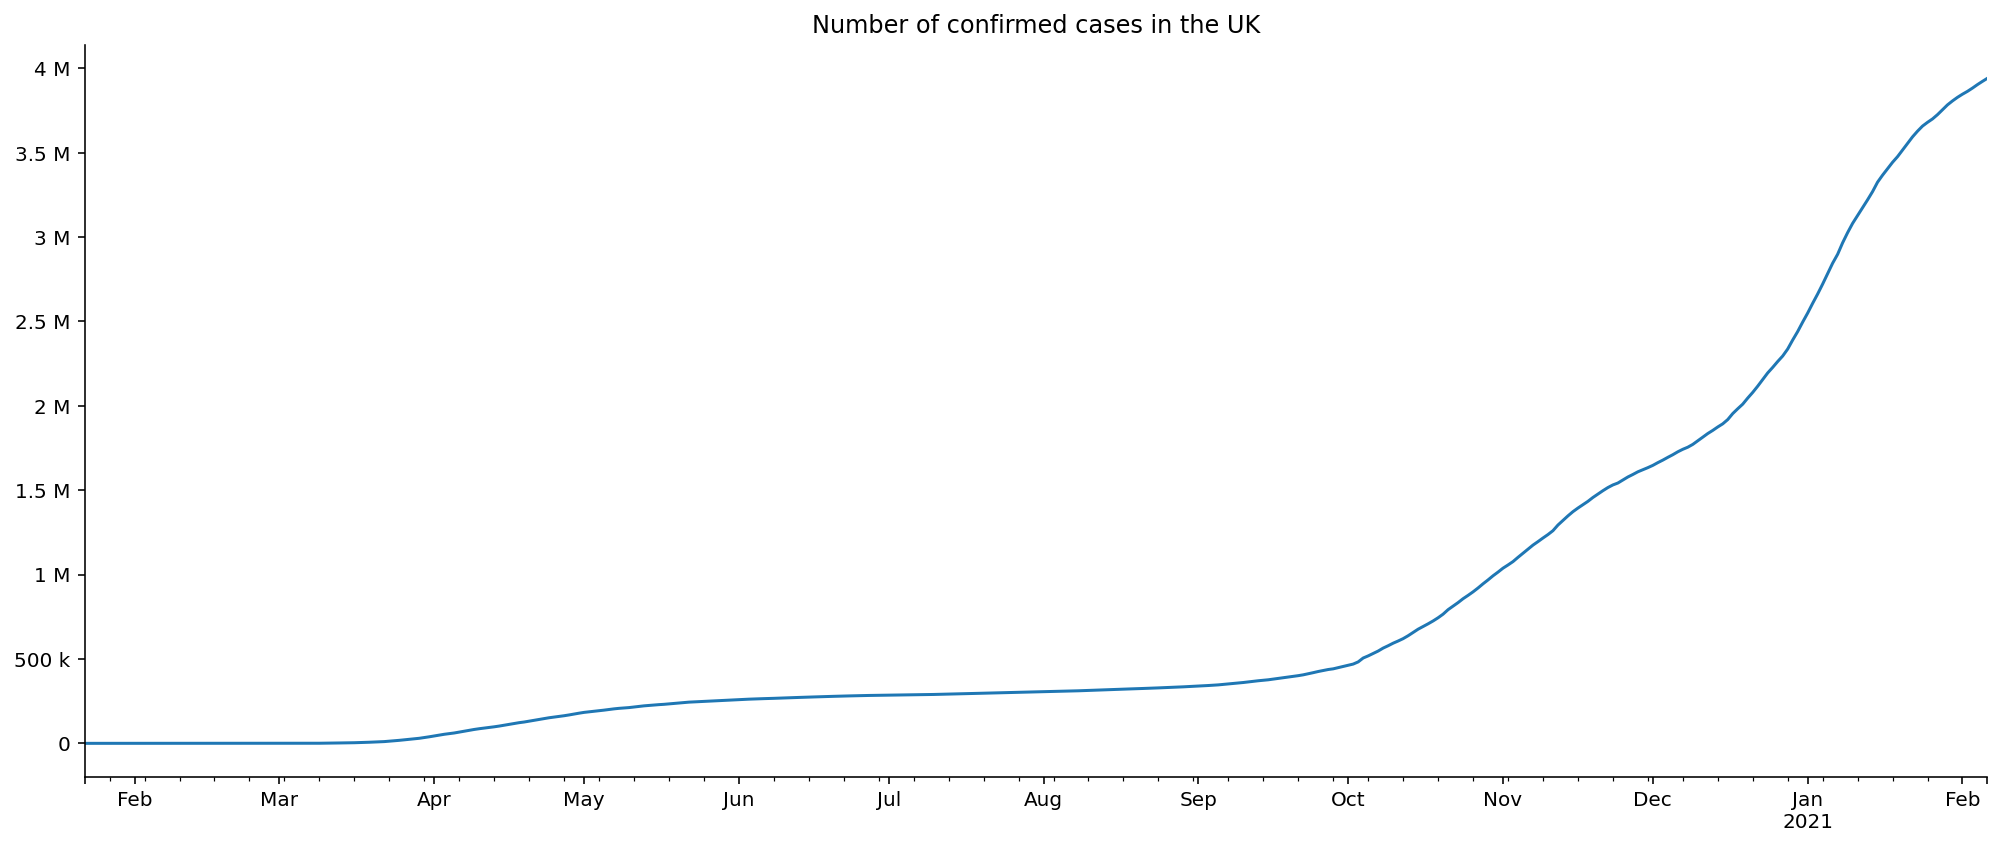

In [9]:
uk = confirmed_T['United Kingdom']

ax = uk.plot(title='Number of confirmed cases in the UK', figsize=(14, 6))
ax.get_yaxis().set_major_formatter(
    mtick.EngFormatter())
sns.despine()
ax.get_figure().tight_layout()

## ARIMA (Autoregressive Integrated Moving Average)

[How to Create an ARIMA Model for Time Series Forecasting in Python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

Adopting an ARIMA model for a time series **assumes that the underlying process that generated the observations is an ARIMA process**.

... series has a clear **trend**. This suggests that the time series is not [stationary](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322) and will require differencing to make it stationary, at least a difference order of 1 (this is what is meant by *integrated*).

A statistical model is [**autoregressive**](https://www.investopedia.com/terms/a/autoregressive.asp) if it predicts future values based on past values.

- [autocorrelation plot](https://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm)
- [interpretation of ACF](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/time-series/how-to/autocorrelation/interpret-the-results/autocorrelation-function-acf/)

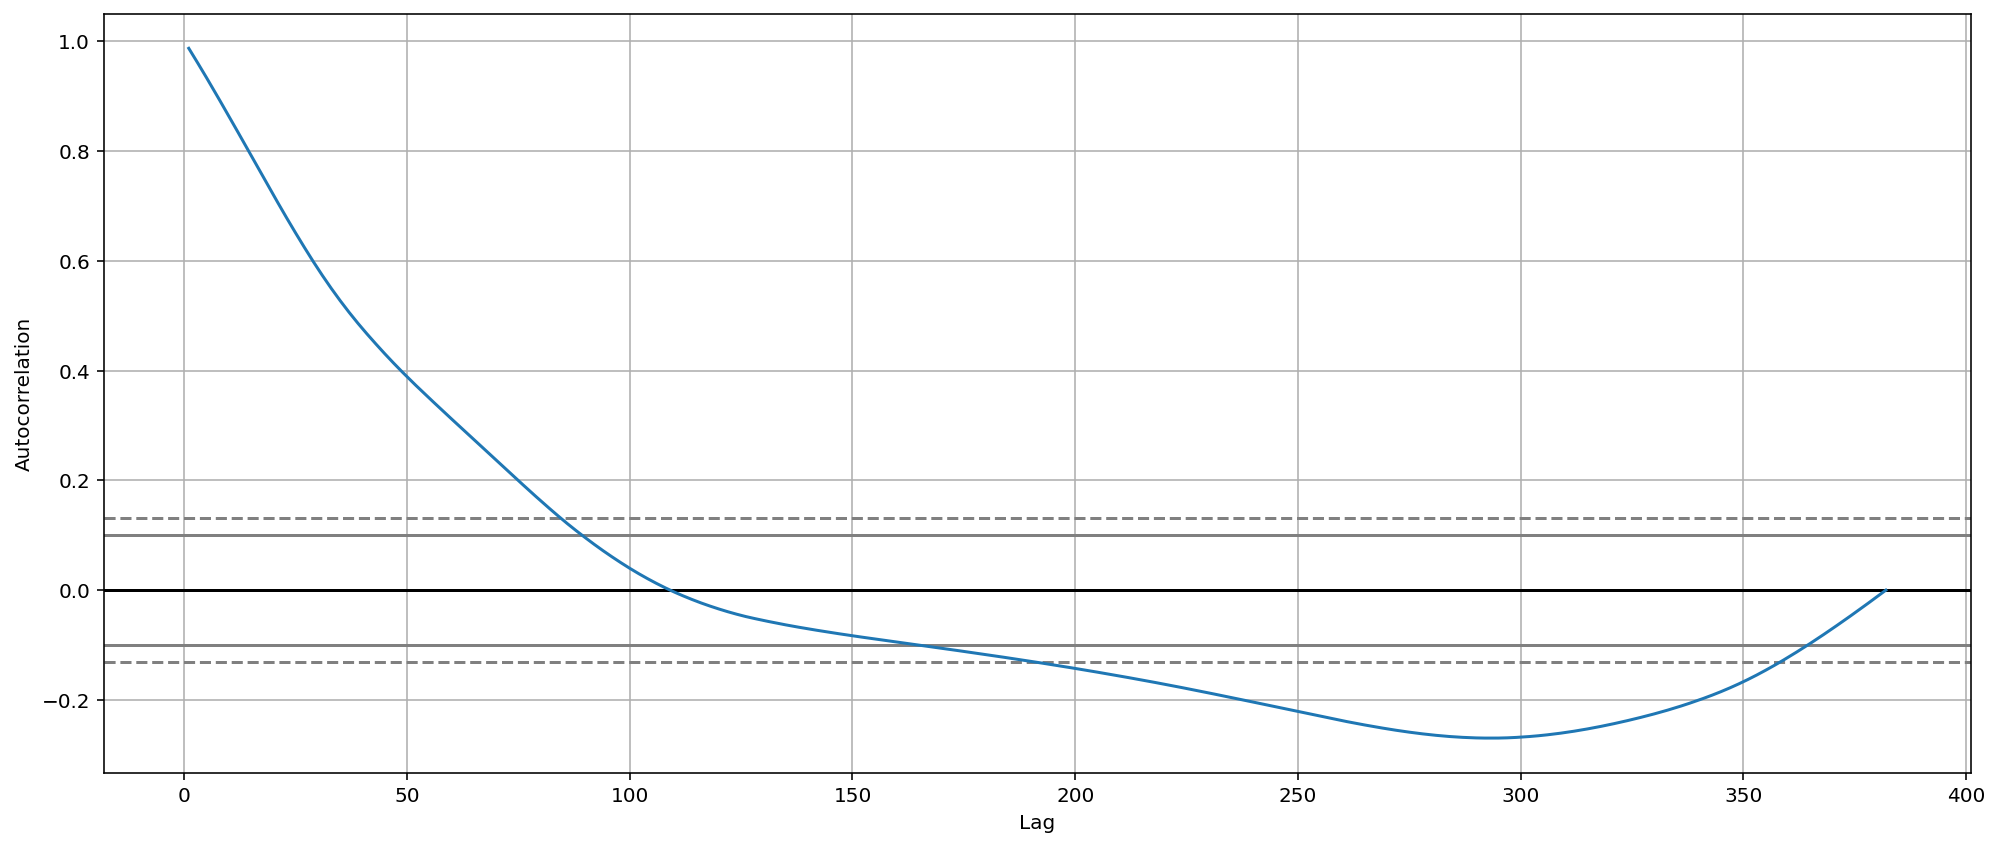

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))

_ = pd.plotting.autocorrelation_plot(uk, ax=ax)
fig.tight_layout()

[statsmodels ARIMA](https://www.statsmodels.org/v0.12.0/generated/statsmodels.tsa.arima.model.ARIMA.html)

In [23]:
model_uk = ARIMA(uk, order=(5, 1, 0), freq='D').fit()

model_uk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         United Kingdom   No. Observations:                  382
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3529.426
Date:                Sun, 07 Feb 2021   AIC                           7070.852
Time:                        23:58:22   BIC                           7094.509
Sample:                    01-22-2020   HQIC                          7080.238
                         - 02-06-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8046      0.024     33.527      0.000       0.758       0.852
ar.L2          0.1175      0.038      3.082      0.002       0.043       0.192
ar.L3         -0.0504      0.036     -1.417      0.156      -0.120       0.019
ar.L4          0.0001      0.039      0.003      0.998      -0.076       0.076
ar.L5          0.1234      0.033      3.732      0.000       0.059       0.188
sigma2      6.594e+06   1.17e-09   5.65e+15      0.000    6.59e+06    6.59e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              1575.53
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):             104.95   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+32. Standard errors may be unstable.
"""

In [12]:
type(model_uk.resid)

pandas.core.series.Series

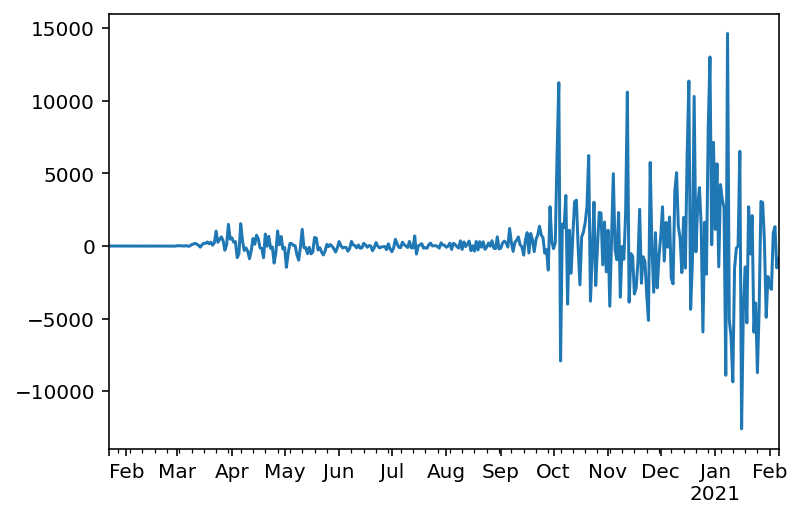

In [13]:
ax = model_uk.resid.plot()

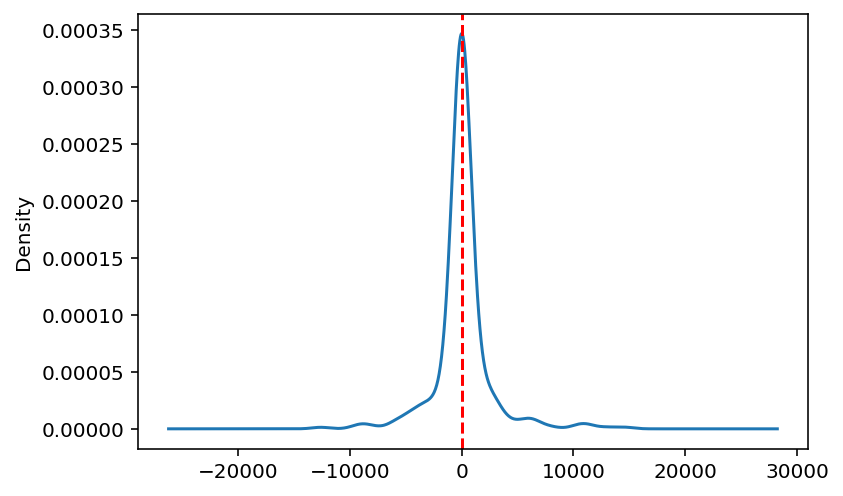

In [14]:
ax = model_uk.resid.plot(kind='kde')
line = plt.axvline(x=0, ls='--', color='red')

In [15]:
model_uk.resid.describe().round(1)

count      382.0
mean       122.0
std       2548.1
min     -12587.1
25%       -236.0
50%          0.0
75%        338.1
max      14632.7
dtype: float64

#### Plot predictions

In [16]:
forecast = model_uk.get_forecast(uk.index[-1].date() + timedelta(days=20))
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

ci_lo = yhat_conf_int.iloc[:, 0]
ci_up = yhat_conf_int.iloc[:, 1]

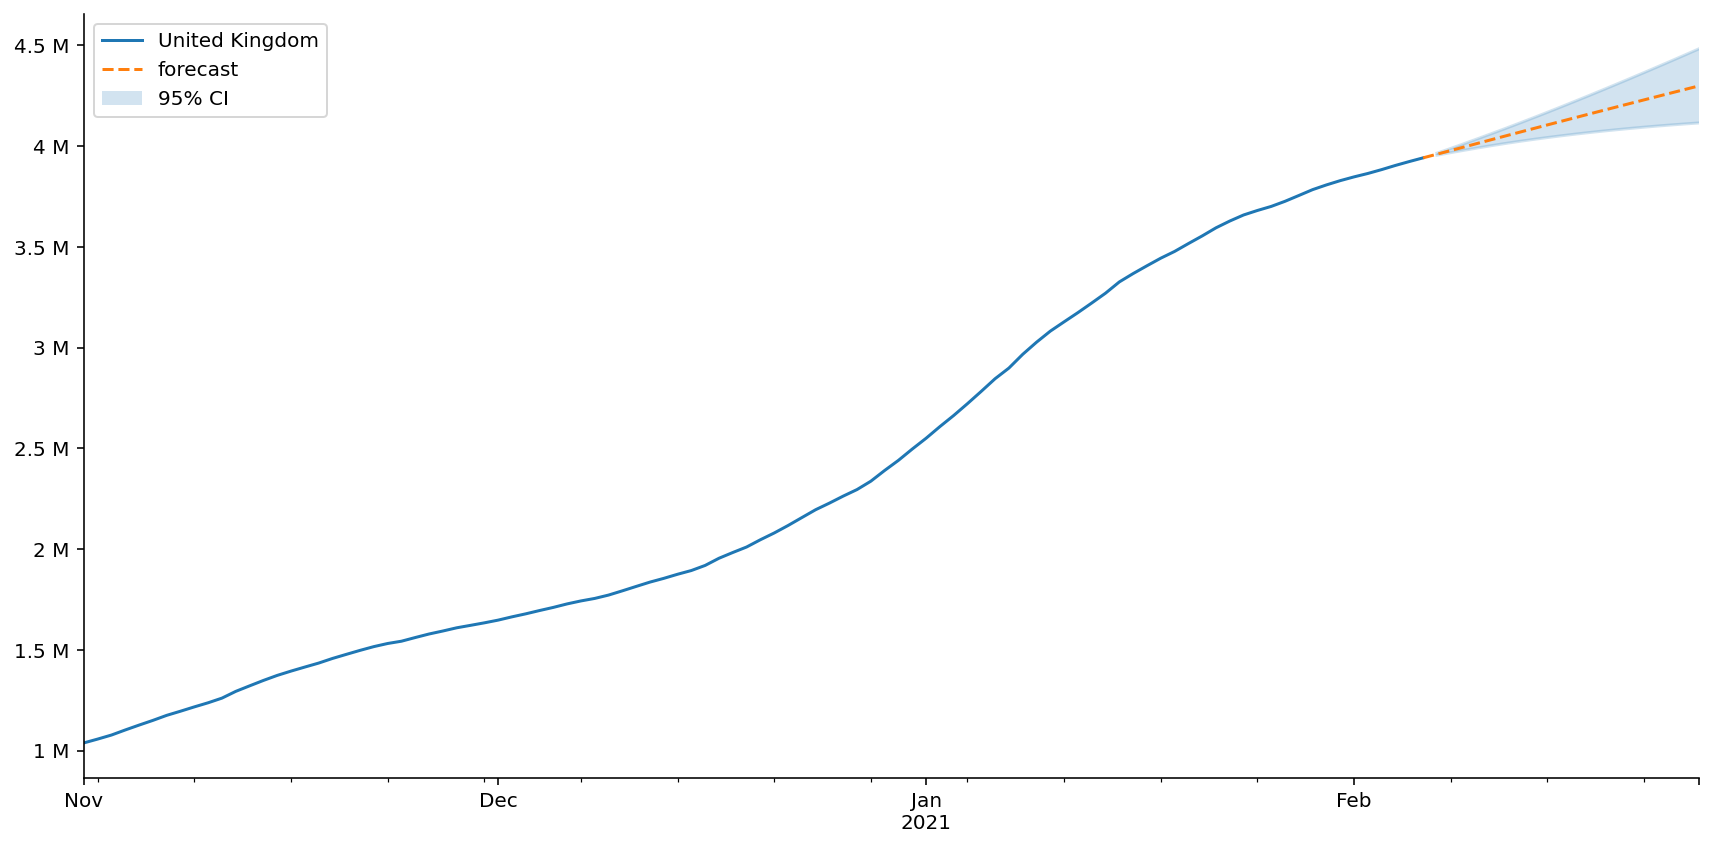

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
        
# ts
_ = uk['2020-11-01':].plot(ax=ax, label=uk.name)

# CI
_ = ci_lo.plot(ax=ax, alpha=0.2, color='C0', label='')
_ = ci_up.plot(ax=ax, alpha=0.2, color='C0', label='')

# forecast
_ = pd.concat([uk.tail(1), yhat]).plot(ax=ax, ls='--', color='C1', label='forecast')

# Fill
_ = ax.fill_between(yhat_conf_int.index, ci_lo, ci_up, alpha=0.2, label='95% CI')

ax.get_yaxis().set_major_formatter(mtick.EngFormatter())
legend = ax.legend()
sns.despine()
fig.tight_layout()

#### Test VS Prediction Curve

In [18]:
def split(ts):
    """ Splitting 95%/5% because of little amount of data. """
    size = int(len(ts) * 0.95)
    train, test = ts[:size], ts[size:]
    return train, test

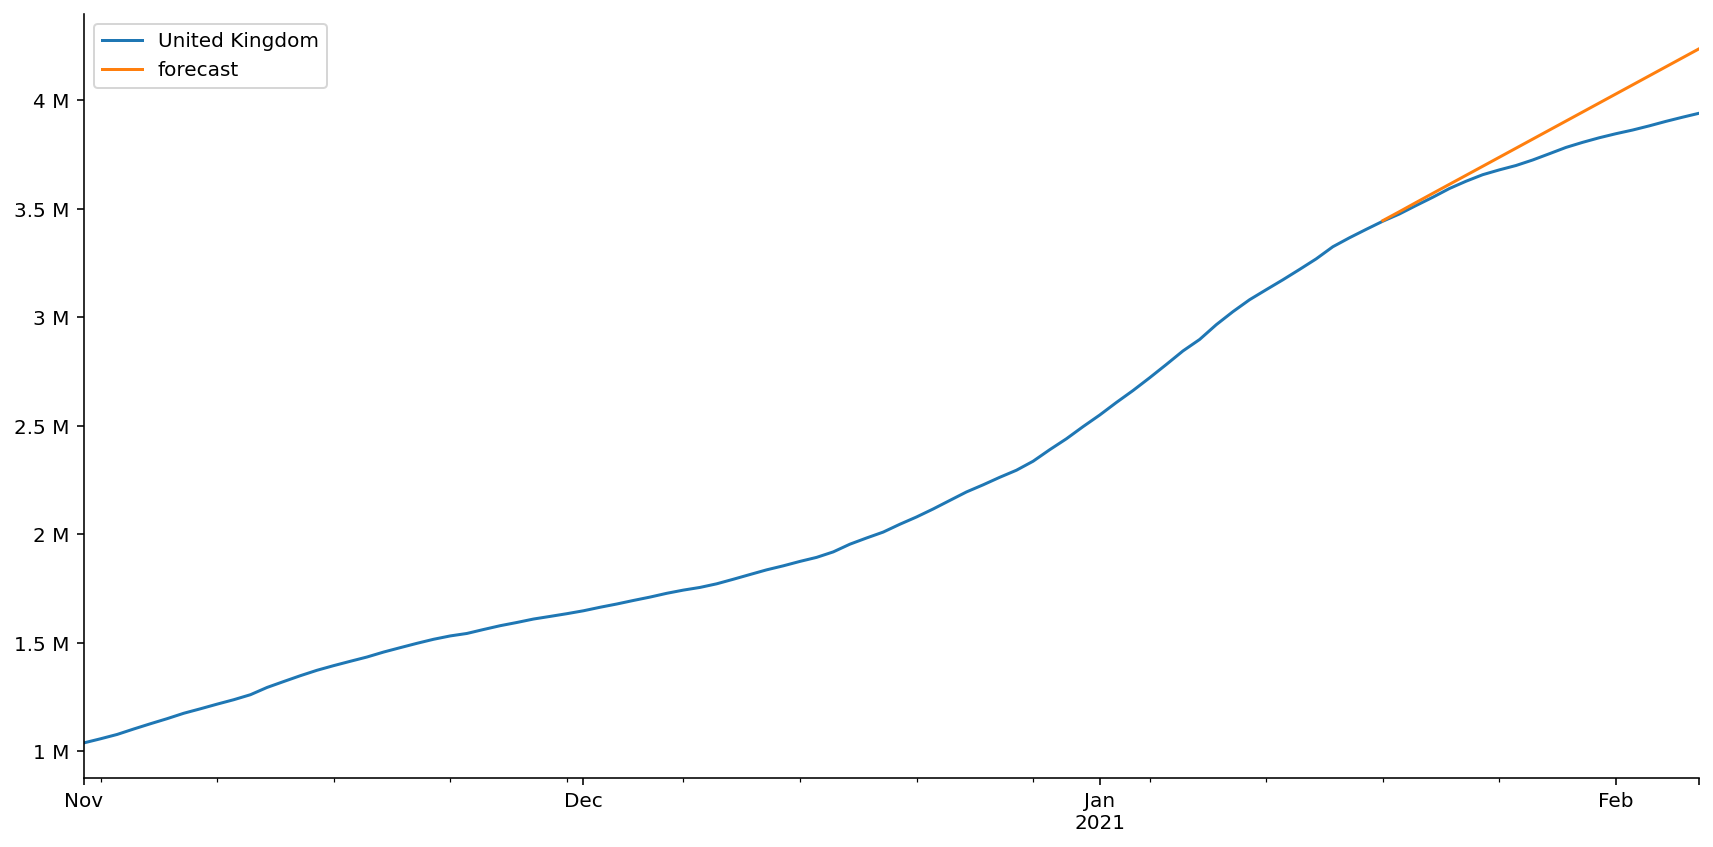

In [22]:
ts, train = split(uk)
model_ts = ARIMA(ts, order=(5, 1, 0), freq='D').fit()

forecast = model_ts.get_forecast(len(train))
yhat = forecast.predicted_mean


fig, ax = plt.subplots(figsize=(12, 6))
        
# ts
_ = uk['2020-11-01':].plot(ax=ax, label=uk.name)


# forecast
_ = yhat.plot(ax=ax, color='C1', label='forecast')


ax.get_yaxis().set_major_formatter(mtick.EngFormatter())
legend = ax.legend()
sns.despine()
fig.tight_layout()

In [20]:
pd.concat([
    uk.tail(1),
    model_uk.get_forecast(uk.index[-1].date() + timedelta(days=2)).predicted_mean
]).round(0).astype(int)

2021-02-06    3941273
2021-02-07    3959349
2021-02-08    3977456
dtype: int64